In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
%matplotlib inline

In [2]:
sdf = pd.read_csv('wrangled_train_solos_df.csv', index_col=0)

In [3]:
sdf.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,0,0,100.00,0,0,45,0,1,1,...,1560,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,0,0,8.54,0,0,48,1000,0,0,...,-1,2004.0,0,0.00,0,0,1089.00,6,1500,0.7370
2,b7807186e3f679,0,1,324.20,1,5,5,986,4,1,...,-1,1228.0,0,76.80,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,0,3,254.20,0,12,13,0,2,1,...,1536,2368.0,0,15.29,0,0,1787.00,3,0,0.8213
4,47143f942503e0,0,0,136.90,0,0,37,0,1,1,...,1500,0.0,0,0.00,0,0,270.80,1,0,0.3474


In [4]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719935 entries, 0 to 719934
Data columns (total 24 columns):
Id                 719935 non-null object
assists            719935 non-null int64
boosts             719935 non-null int64
damageDealt        719935 non-null float64
headshotKills      719935 non-null int64
heals              719935 non-null int64
killPlace          719935 non-null int64
killPoints         719935 non-null int64
kills              719935 non-null int64
killStreaks        719935 non-null int64
longestKill        719935 non-null float64
matchDuration      719935 non-null int64
maxPlace           719935 non-null int64
numGroups          719935 non-null int64
rankPoints         719935 non-null int64
rideDistance       719935 non-null float64
roadKills          719935 non-null int64
swimDistance       719935 non-null float64
teamKills          719935 non-null int64
vehicleDestroys    719935 non-null int64
walkDistance       719935 non-null float64
weaponsAcquired  

In [5]:
sdf.describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,...,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000
mean,0.060911,1.060325,118.633610,0.247729,1.013273,47.496291,447.312046,0.931581,0.474193,21.526636,...,966.902338,463.387331,0.005117,5.090264,0.011450,0.004514,955.432587,3.583660,557.157886,0.487390
std,0.285385,1.799858,165.469255,0.648921,2.405053,27.716368,595.075806,1.571316,0.562464,46.526939,...,744.253353,1374.161065,0.088000,34.209275,0.106389,0.069638,1069.792064,2.579846,728.765955,0.298442
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.200000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.484000
75%,0.000000,2.000000,169.100000,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.810000,...,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747600
max,21.000000,28.000000,5480.000000,26.000000,63.000000,100.000000,1970.000000,48.000000,18.000000,1002.000000,...,2857.000000,40700.000000,18.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


First we're going to look at kills. We'll break this dataframe up into high kill (greater than 5) games and low kill (less than 5) kill games and see if there's any real impact on how that affects the winPlacePerc.

In [6]:
greater_than = sdf[(sdf['kills'] >= 5)]
less_than = sdf[(sdf['kills'] < 5)]

In [7]:
greater_than.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
13,707550186fd7f7,1,6,604.5,2,7,4,0,5,1,...,1543,0.0,0,0.0,0,0,1766.0,2,0,0.9893
28,eb7a3e9f50eca5,0,5,778.0,3,2,2,1693,8,1,...,-1,0.0,0,0.0,0,0,2422.0,5,1506,1.0000
54,029a693a75ef57,1,1,568.5,1,0,3,1339,5,1,...,-1,5188.0,1,0.0,0,0,826.5,4,1537,0.5977
84,f0fcba5a666b24,1,5,704.0,1,6,4,1618,5,1,...,-1,1530.0,0,0.0,0,0,3292.0,4,1635,0.9150
116,e65e9fa8ba75c6,0,11,817.0,3,1,1,0,9,2,...,1643,0.0,0,0.0,0,0,2396.0,4,0,0.8296


In [8]:
less_than.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,0,0,100.00,0,0,45,0,1,1,...,1560,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,0,0,8.54,0,0,48,1000,0,0,...,-1,2004.0,0,0.00,0,0,1089.00,6,1500,0.7370
2,b7807186e3f679,0,1,324.20,1,5,5,986,4,1,...,-1,1228.0,0,76.80,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,0,3,254.20,0,12,13,0,2,1,...,1536,2368.0,0,15.29,0,0,1787.00,3,0,0.8213
4,47143f942503e0,0,0,136.90,0,0,37,0,1,1,...,1500,0.0,0,0.00,0,0,270.80,1,0,0.3474


In [9]:
greater_than['Id'].count(), less_than['Id'].count()

(25384, 694551)

A lot more people had less than 5 kills than had 5 or more kills. Let's see if there's any correlation to winPlacePerc using a bootstrap test.

In [10]:
def bootstrap_reps(data, func):
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

In [11]:
np.random.seed(47)
N_rep = 10000

greater_bs_reps = np.empty(N_rep)
less_bs_reps = np.empty(N_rep)

In [12]:
for i in range(N_rep):
    greater_bs_reps[i] = bootstrap_reps(greater_than['winPlacePerc'], np.mean)

for i in range(N_rep):
    less_bs_reps[i] = bootstrap_reps(less_than['winPlacePerc'], np.mean)

print(np.percentile(greater_bs_reps, [2.5, 97.5]), np.percentile(less_bs_reps, [2.5, 97.5]))

[0.89408181 0.8974301 ] [0.47178149 0.47315208]


In [13]:
np.mean(greater_than['winPlacePerc']), np.mean(less_than['winPlacePerc'])

(0.8957556058934651, 0.4724657043183147)

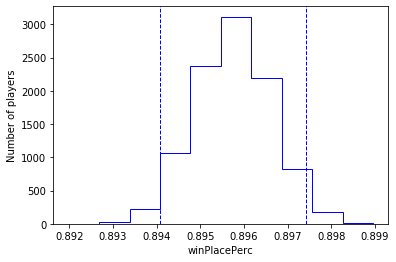

In [14]:
plt.hist(greater_bs_reps, histtype='step', color='b')
plt.xlabel('winPlacePerc')
plt.ylabel('Number of players')
plt.axvline(np.percentile(greater_bs_reps, 2.5), linewidth=1, color='b', linestyle='--')
plt.axvline(np.percentile(greater_bs_reps, 97.5), linewidth=1, color='b', linestyle='--')

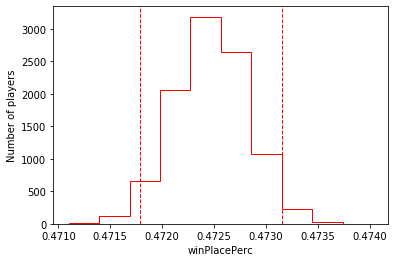

In [15]:
plt.hist(less_bs_reps, histtype='step', color='r')
plt.xlabel('winPlacePerc')
plt.ylabel('Number of players')
plt.axvline(np.percentile(less_bs_reps, 2.5), linewidth=1, color='r', linestyle='--')
plt.axvline(np.percentile(less_bs_reps, 97.5), linewidth=1, color='r', linestyle='--')

Overall it does seem like the more kills you have, the more likely you are to win. The means of the winPlacePerc in the greater_than dataframe is much higher than that of the less_than dataframe. And the histograms built off the bootstrap tests show that.

Now what about the p-value? If our null hypothesis is: it is as likely that someone can win a game with less than 5 kills as it is with 5 or more kills. A p-value test could prove if we should accept or reject that hypothesis. Fortunately, scipy has a function for that.

In [16]:
from scipy.stats import ttest_ind
ttest_ind(greater_than['winPlacePerc'], less_than['winPlacePerc'], equal_var=False)

Ttest_indResult(statistic=452.7039301763968, pvalue=0.0)

Since the p-value is less than the established threshold of 0.05, we  can reject the null hypothesis, which means that
it is statistically unlikely that we would observe these results purely by chance, and therefore the observed difference is statistically significant.

Using Statsmodels, we can take a look at a number of different features in this data set and see if they are a good predictor for winPlacePerc

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
m = ols('winPlacePerc ~ kills', sdf).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                 2.183e+05
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:11:13   Log-Likelihood:                -55692.
No. Observations:              719935   AIC:                         1.114e+05
Df Residuals:                  719933   BIC:                         1.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4020      0.000   1122.431      0.0

ols gave us the same p-value as our bootstrap test earlier did. Let's put some other variables into this and see what else is statistically significant. From our data exploration, damage dealt, kill place, heals, and weapons acquired were also features that could be potentially interesting to look at.

In [19]:
m = ols('winPlacePerc ~ damageDealt', sdf).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                 2.242e+05
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:11:14   Log-Likelihood:                -53424.
No. Observations:              719935   AIC:                         1.069e+05
Df Residuals:                  719933   BIC:                         1.069e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3831      0.000   1013.745      

In [20]:
m = ols('winPlacePerc ~ killPlace', sdf).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                 9.767e+05
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:11:14   Log-Likelihood:             1.5758e+05
No. Observations:              719935   AIC:                        -3.151e+05
Df Residuals:                  719933   BIC:                        -3.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8754      0.000   1925.738      0.0

In [21]:
m = ols('winPlacePerc ~ heals', sdf).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                 1.385e+05
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:11:14   Log-Likelihood:                -87691.
No. Observations:              719935   AIC:                         1.754e+05
Df Residuals:                  719933   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4369      0.000   1249.905      0.0

In [22]:
m = ols('winPlacePerc ~ weaponsAcquired', sdf).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 4.213e+05
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:11:15   Log-Likelihood:                 14827.
No. Observations:              719935   AIC:                        -2.965e+04
Df Residuals:                  719933   BIC:                        -2.963e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2355      0.000    4

Looking at these, they all have p-values of 0, which means that all of these variables are statistically significant predictors of win place percentage, and we reject our null hypothesis. However, looking at the $R^2$ values, some seem to be more correlated than others. Specifically killPlace. Let's look at it using a joint plot from Seaborn with a linear regression line added in.

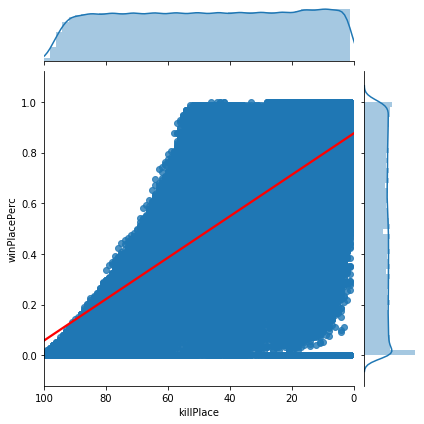

In [23]:
sns.jointplot(x='killPlace', y='winPlacePerc', data=sdf, xlim=(100,0), kind='reg', joint_kws={'line_kws':{'color':'red'}})

killPlace seems to be a fairly good indicator of winPlacePerc, based on this graph and linear regression line.